Imports

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import TheilSenRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


Loading the Real Estate Valuation Dataset

In [10]:
real_estate_valuation = fetch_ucirepo(id=477) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
df = pd.concat([X,y],axis=1)
print(df.columns)
# I renamed the columns to my own convenience 
df.columns = ['Transaction_Date','House_Age','Nearest_Station','N_Conv_Stores','Lat','Long','Unit_Area']
print(df.columns)


Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


Pre Processing the Data

In [11]:
print(df.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Index(['Transaction_Date', 'House_Age', 'Nearest_Station', 'N_Conv_Stores',
       'Lat', 'Long', 'Unit_Area'],
      dtype='object')


Defining the Model

In [12]:
tsr = TheilSenRegressor()
tsr.fit(X_train,y_train)

c:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TheilSenRegressor()

Making Predictions

In [13]:
y_train_pred = tsr.predict(X_train)
y_test_pred = tsr.predict(X_test)


Evaluating the Model

Train MSE: 91.8684881056258
Test MSE: 55.319839901621805


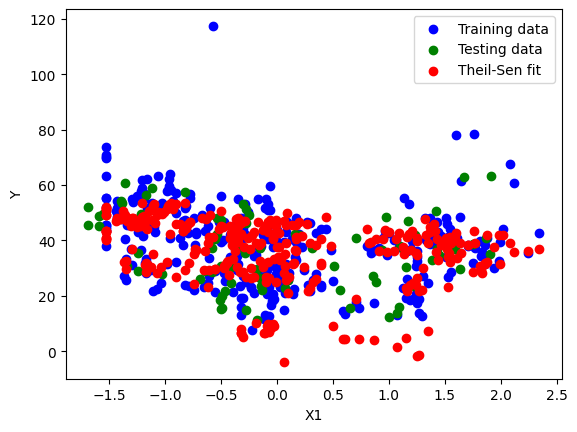

In [15]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
plt.scatter(X_train[:, 1], y_train, color='blue', label='Training data')
plt.scatter(X_test[:, 1], y_test, color='green', label='Testing data')
plt.scatter(X_train[:, 1], y_train_pred, color='red', label='Theil-Sen fit')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()
